In [4]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append('..')
from Utils import eda_helper
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train=pd.read_csv('../dataset/train.csv')

In [6]:
train

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.50,0.12,0.00,0.26,0.12,0.279523,-0.054170,-0.391227,0.400222,1.032029,...,-0.028366,-0.327297,-0.316933,-1.294092,-0.530259,-0.421526,-0.320869,0.709627,-0.737244,-0.744289
1996,0.19,0.31,0.00,0.37,0.13,-0.887185,0.610050,0.178606,1.083154,-2.822749,...,-0.449245,0.156778,-0.367445,-0.938615,-0.577451,-0.209996,-0.370505,-0.195531,-0.032834,0.269718
1997,0.38,0.06,0.14,0.31,0.11,0.568978,-0.196759,-0.646318,-0.980070,1.032029,...,0.029135,0.164890,-0.092942,-1.134490,-0.437479,-0.695636,-0.101073,0.063650,0.624368,-0.477053
1998,0.50,0.16,0.00,0.18,0.16,-0.067453,0.321977,-0.137535,0.238507,0.017455,...,-0.232960,-0.464947,0.112536,-0.793522,-0.811272,-1.194914,0.100644,0.760116,-0.751394,-0.857598


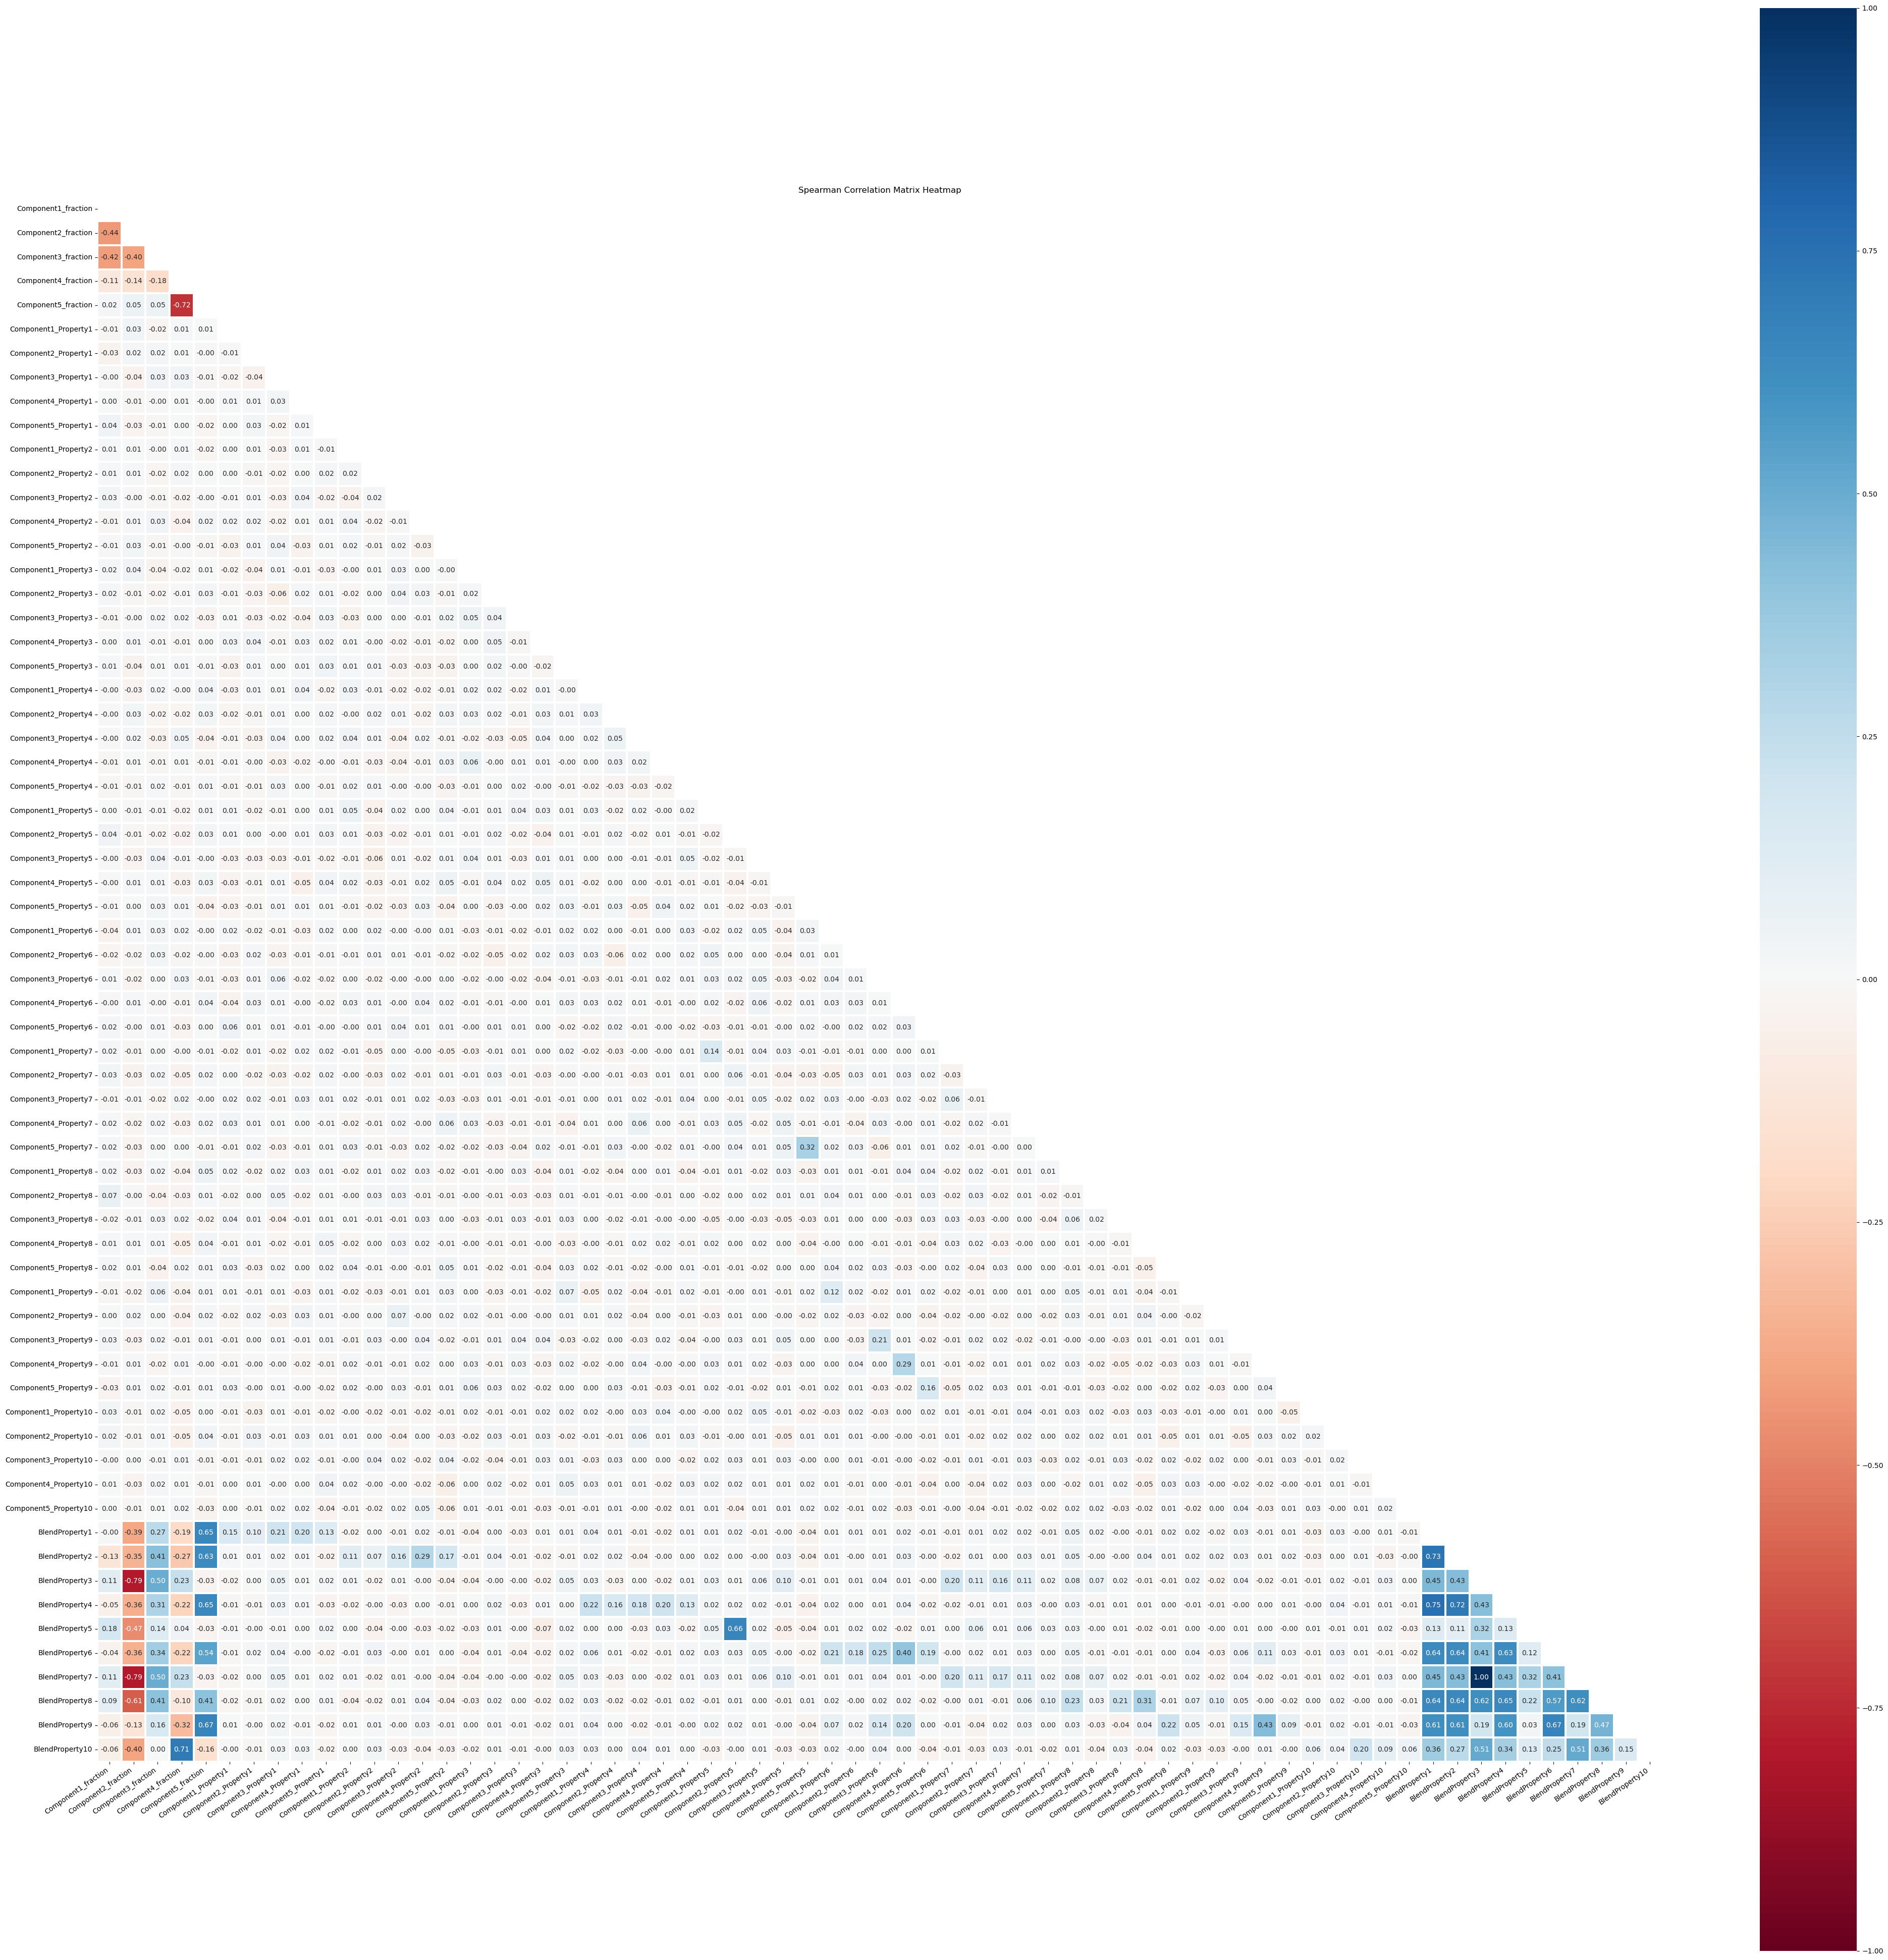

In [9]:
eda_helper.correlation_heatmap(train,figsize=(50,50))

In [7]:
blend_properties=train[['BlendProperty1','BlendProperty2','BlendProperty3','BlendProperty4','BlendProperty5','BlendProperty6','BlendProperty7','BlendProperty8','BlendProperty9','BlendProperty10']]

In [8]:
blend_properties

,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073
...,...,...,...,...,...,...,...,...,...,...
1995,-0.028366,-0.327297,-0.316933,-1.294092,-0.530259,-0.421526,-0.320869,0.709627,-0.737244,-0.744289
1996,-0.449245,0.156778,-0.367445,-0.938615,-0.577451,-0.209996,-0.370505,-0.195531,-0.032834,0.269718
1997,0.029135,0.164890,-0.092942,-1.134490,-0.437479,-0.695636,-0.101073,0.063650,0.624368,-0.477053
1998,-0.232960,-0.464947,0.112536,-0.793522,-0.811272,-1.194914,0.100644,0.760116,-0.751394,-0.857598


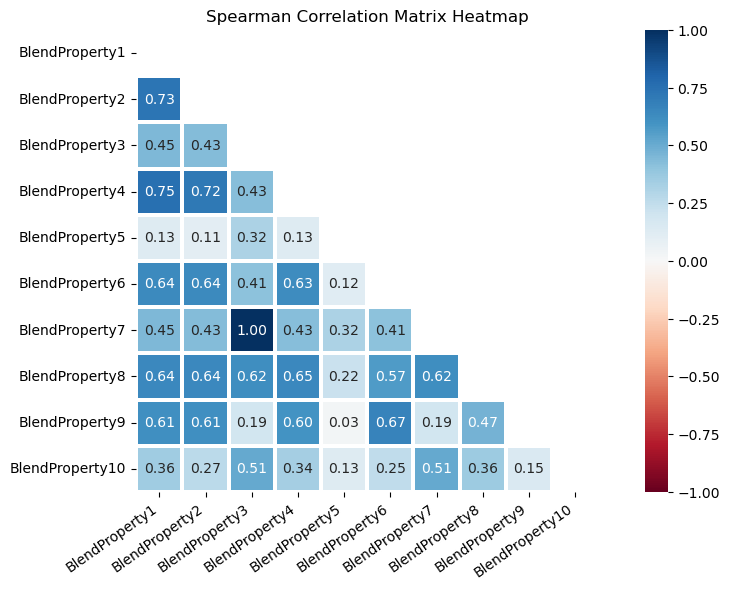

In [12]:
eda_helper.correlation_heatmap(blend_properties)

In [13]:
train[['BlendProperty3','BlendProperty7']]

,BlendProperty3,BlendProperty7
0,0.321670,0.305850
1,-0.437385,-0.439171
2,0.622687,0.601289
3,-1.865442,-1.840566
4,0.301785,0.286344
...,...,...
1995,-0.316933,-0.320869
1996,-0.367445,-0.370505
1997,-0.092942,-0.101073
1998,0.112536,0.100644


In [16]:
X_train=train.drop(blend_properties.columns,axis=1)

In [27]:

# It's good practice to work on copies to not alter your original data
X_train_copy = X_train.copy()


In [31]:
target_columns = [col for col in train.columns if 'BlendProperty' in col]
y_train = train[target_columns]

In [35]:


# --- 1. Initialize and Fit the Isolation Forest Model ---
# Let's assume we want to flag about 5% of the data as outliers.
iso_forest = IsolationForest(n_estimators=100,
                             contamination=0.1, # The proportion of outliers to find
                             random_state=42,
                             n_jobs=-1)

# Fit the model and get the predictions (-1 for outliers, 1 for inliers)
outlier_predictions = iso_forest.fit_predict(X_train_copy)


In [36]:


# --- 2. Create a Boolean Mask to Identify Inliers ---
# This is the most important part. We create a mask of True/False values.
# `True` where the prediction is 1 (inlier)
# `False` where the prediction is -1 (outlier)
inlier_mask = (outlier_predictions == 1)


In [37]:

print(f"Original number of samples: {len(X_train_copy)}")
print(f"Number of outliers found: {(inlier_mask == False).sum()}")
print(f"Number of inliers retained: {inlier_mask.sum()}")
print("-" * 30)



Original number of samples: 2000
Number of outliers found: 200
Number of inliers retained: 1800
------------------------------


In [38]:

# --- 3. Apply the Mask to Both X_train and y_train ---
# Use the boolean mask to select only the rows that are NOT outliers.
X_train_no_outliers = X_train[inlier_mask]
y_train_no_outliers = y_train[inlier_mask]

# Verify that the number of rows match
print("Shape of X_train after removing outliers:", X_train_no_outliers.shape)
print("Shape of y_train after removing outliers:", y_train_no_outliers.shape)
assert X_train_no_outliers.shape[0] == y_train_no_outliers.shape[0]


# --- 4. Combine into a Single DataFrame and Save ---
# Now, we join the cleaned features and targets side-by-side.
no_outliers_train_df = pd.concat([X_train_no_outliers, y_train_no_outliers], axis=1)

# Save the new, cleaned dataset to a CSV file
no_outliers_train_df.to_csv('no_outliers_train.csv', index=False)


Shape of X_train after removing outliers: (1800, 57)
Shape of y_train after removing outliers: (1800, 10)


In [39]:

print("\nFile 'no_outliers_train.csv' created successfully!")
print("Top 5 rows of the new cleaned dataset:")
no_outliers_train_df.head()


File 'no_outliers_train.csv' created successfully!
Top 5 rows of the new cleaned dataset:


,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


In [40]:
train

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.50,0.12,0.00,0.26,0.12,0.279523,-0.054170,-0.391227,0.400222,1.032029,...,-0.028366,-0.327297,-0.316933,-1.294092,-0.530259,-0.421526,-0.320869,0.709627,-0.737244,-0.744289
1996,0.19,0.31,0.00,0.37,0.13,-0.887185,0.610050,0.178606,1.083154,-2.822749,...,-0.449245,0.156778,-0.367445,-0.938615,-0.577451,-0.209996,-0.370505,-0.195531,-0.032834,0.269718
1997,0.38,0.06,0.14,0.31,0.11,0.568978,-0.196759,-0.646318,-0.980070,1.032029,...,0.029135,0.164890,-0.092942,-1.134490,-0.437479,-0.695636,-0.101073,0.063650,0.624368,-0.477053
1998,0.50,0.16,0.00,0.18,0.16,-0.067453,0.321977,-0.137535,0.238507,0.017455,...,-0.232960,-0.464947,0.112536,-0.793522,-0.811272,-1.194914,0.100644,0.760116,-0.751394,-0.857598


In [41]:
train.columns

Index(['Component1_fraction', 'Component2_fraction', 'Component3_fraction',
       'Component4_fraction', 'Component5_fraction', 'Component1_Property1',
       'Component2_Property1', 'Component3_Property1', 'Component4_Property1',
       'Component5_Property1', 'Component1_Property2', 'Component2_Property2',
       'Component3_Property2', 'Component4_Property2', 'Component5_Property2',
       'Component1_Property3', 'Component2_Property3', 'Component3_Property3',
       'Component4_Property3', 'Component5_Property3', 'Component1_Property4',
       'Component2_Property4', 'Component3_Property4', 'Component4_Property4',
       'Component5_Property4', 'Component1_Property5', 'Component2_Property5',
       'Component3_Property5', 'Component4_Property5', 'Component5_Property5',
       'Component1_Property6', 'Component2_Property6', 'Component3_Property6',
       'Component4_Property6', 'Component5_Property6', 'Component1_Property7',
       'Component2_Property7', 'Component3_Property7', 'C

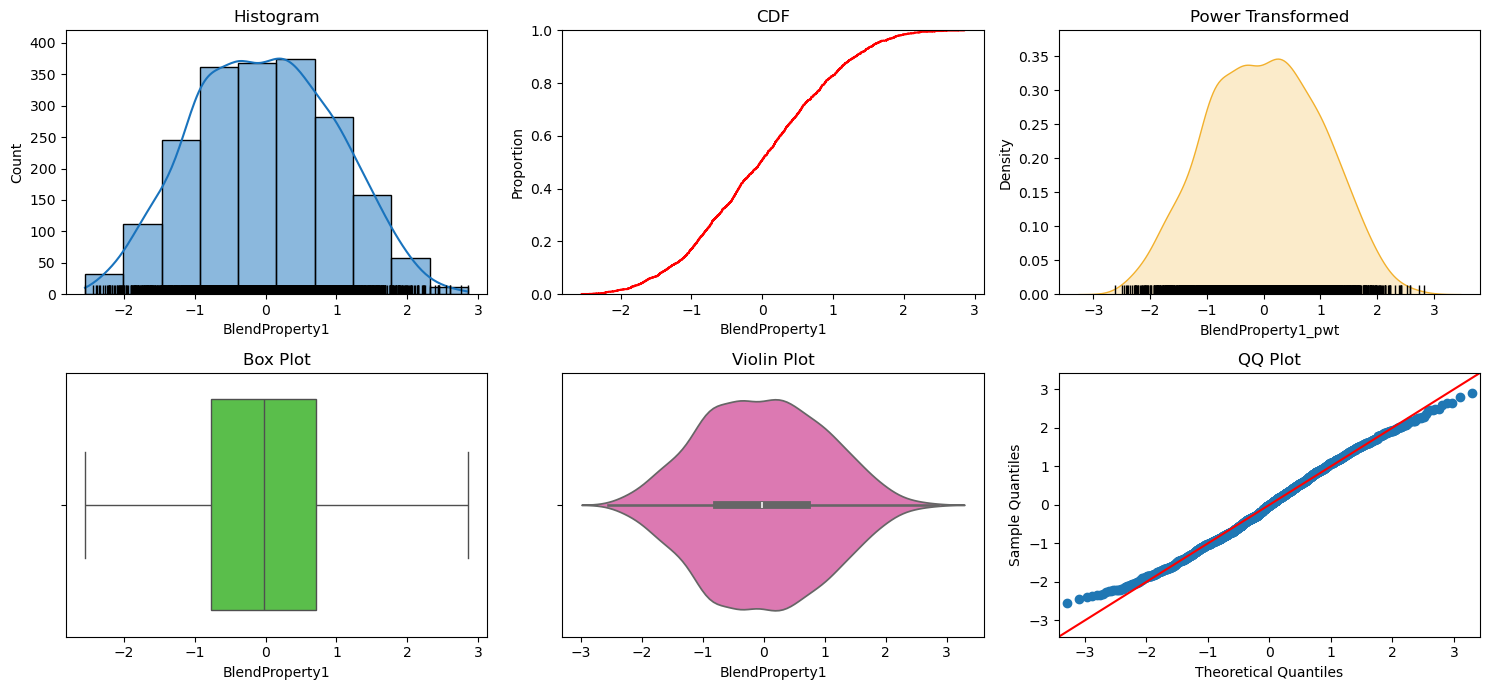

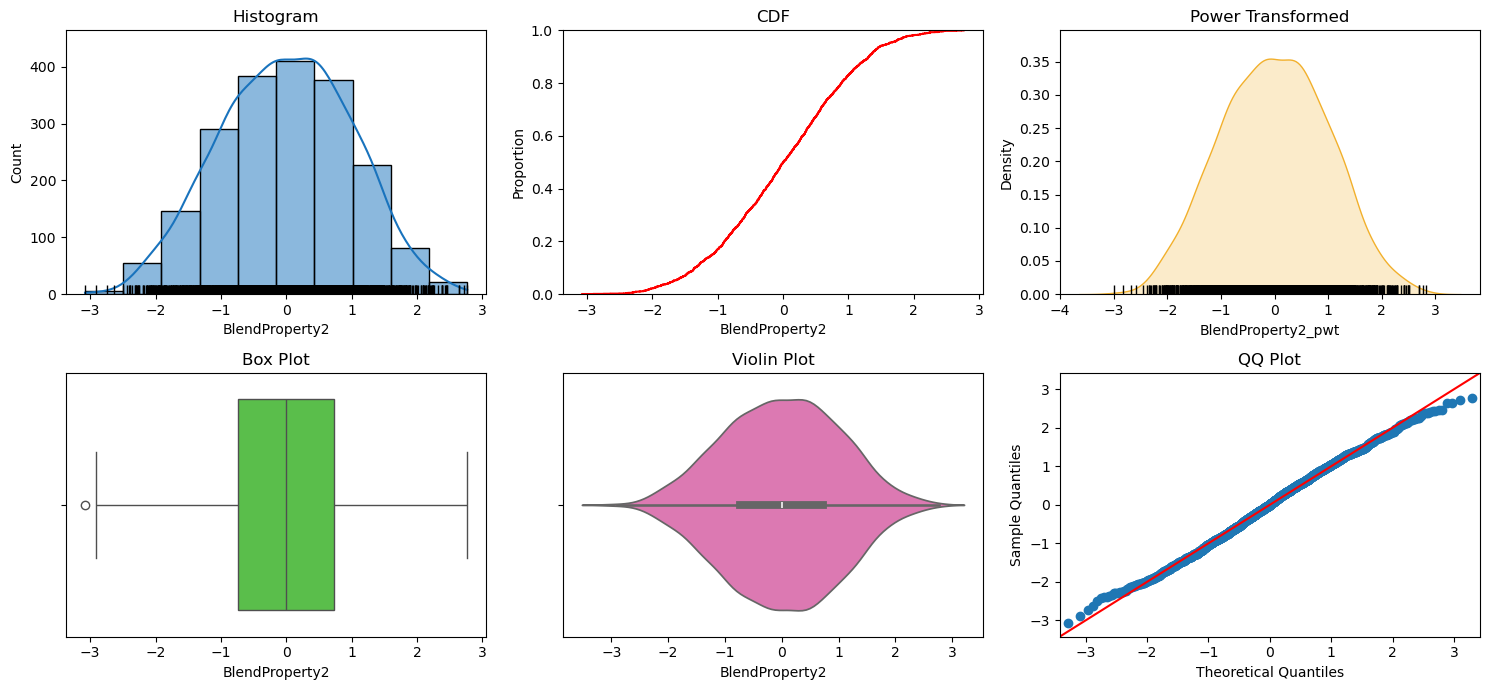

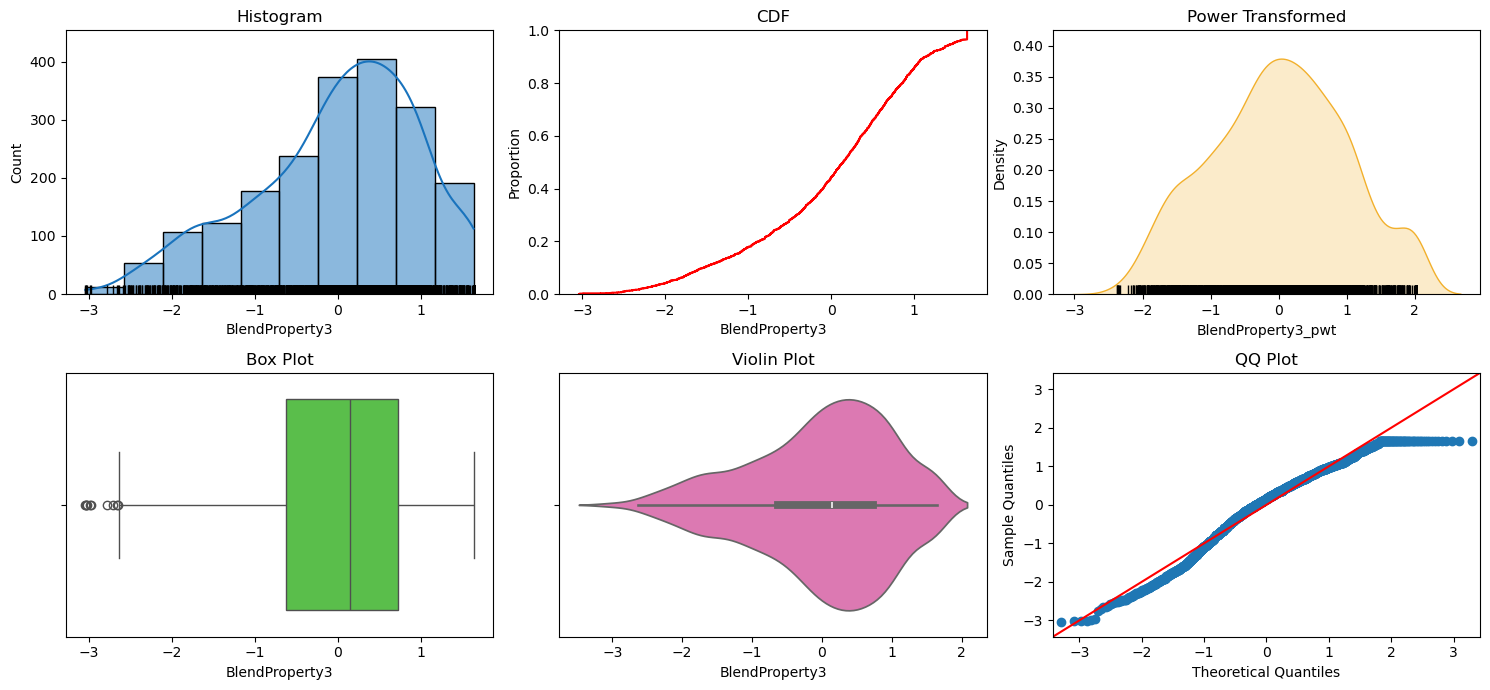

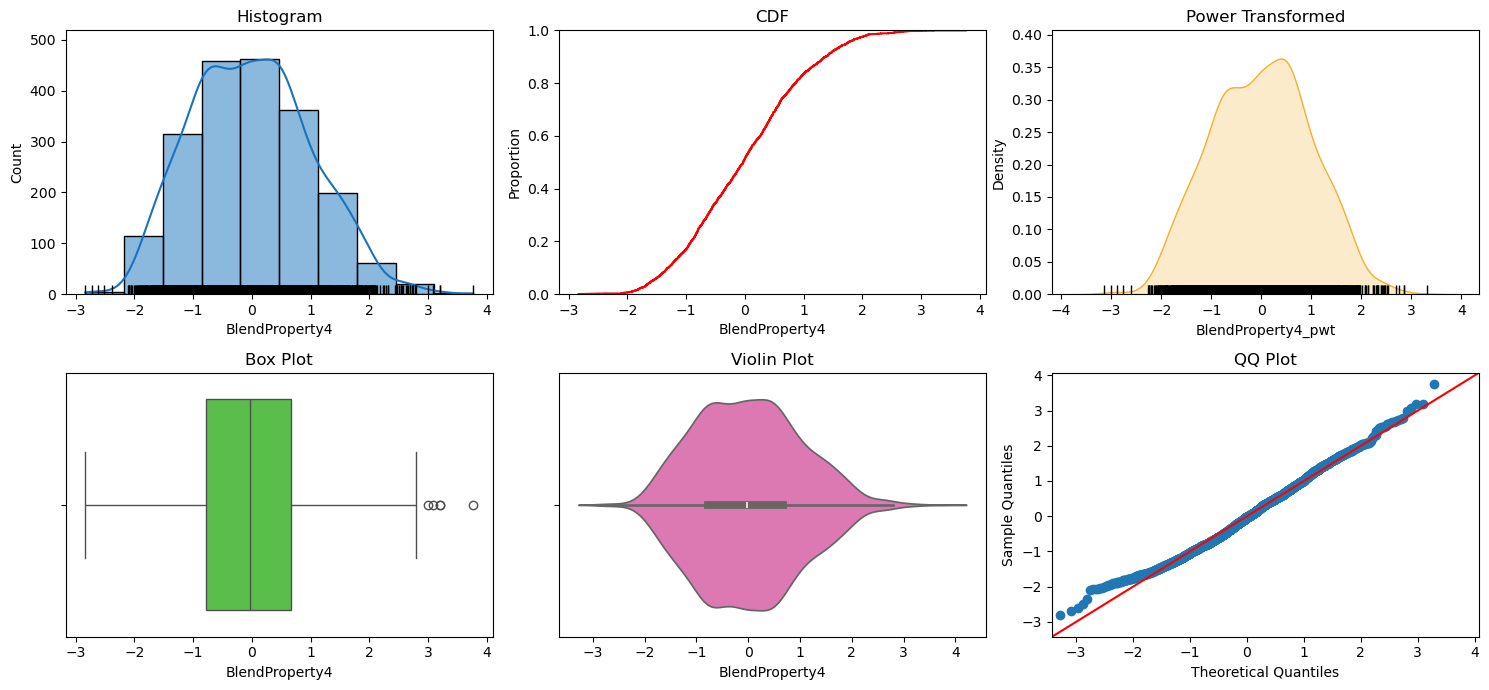

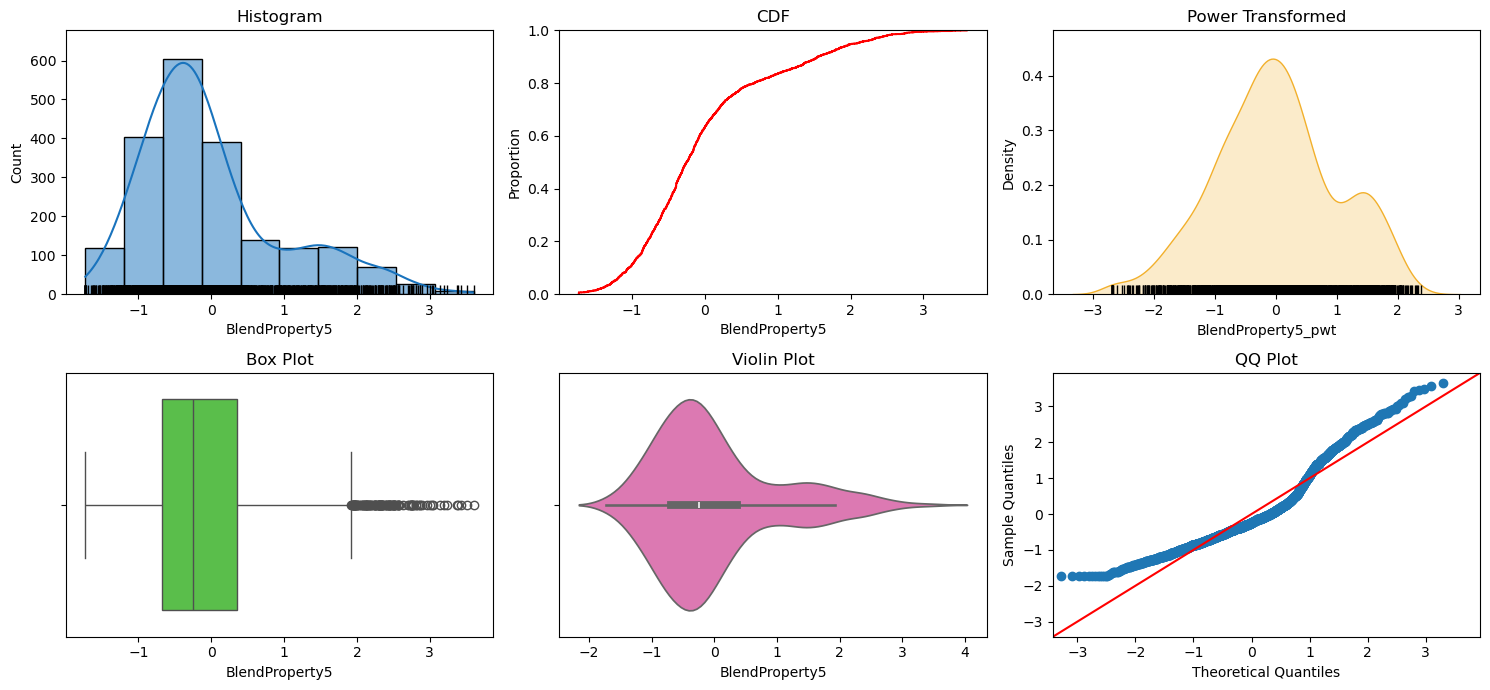

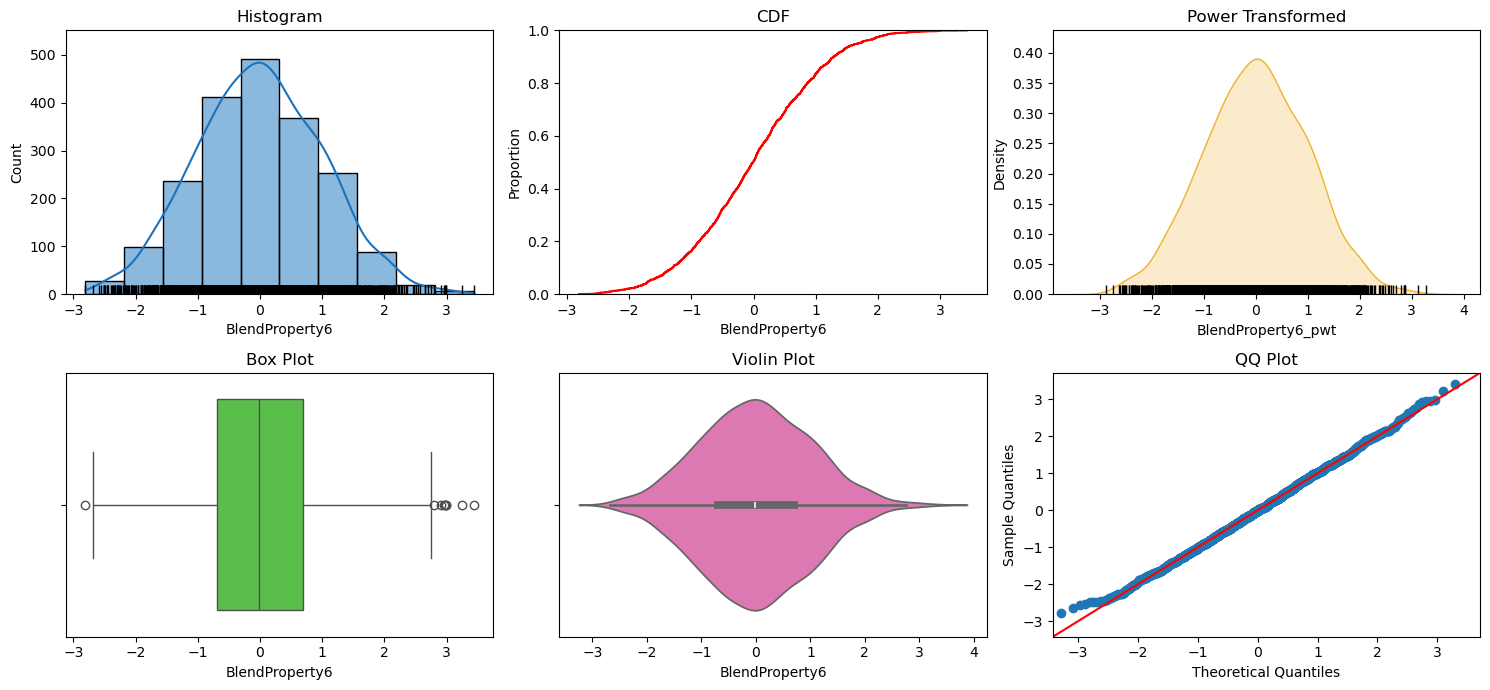

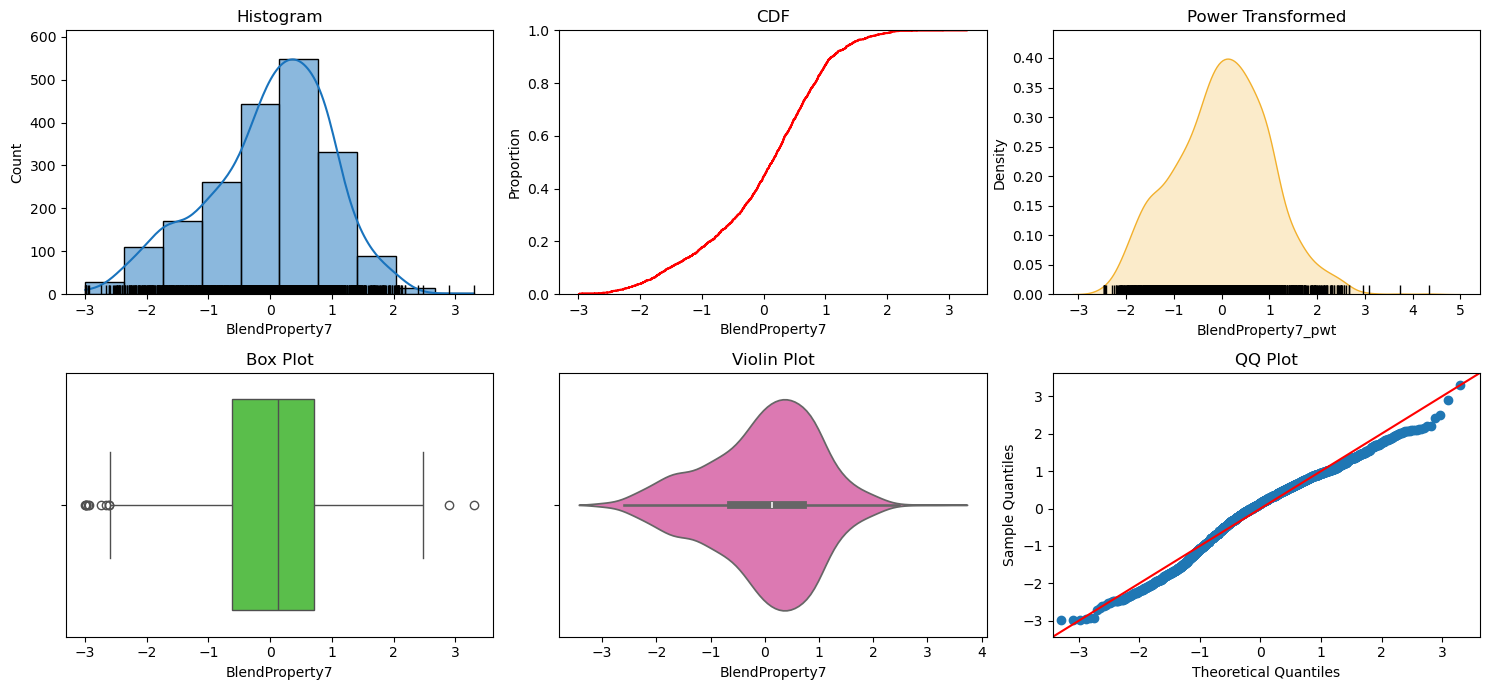

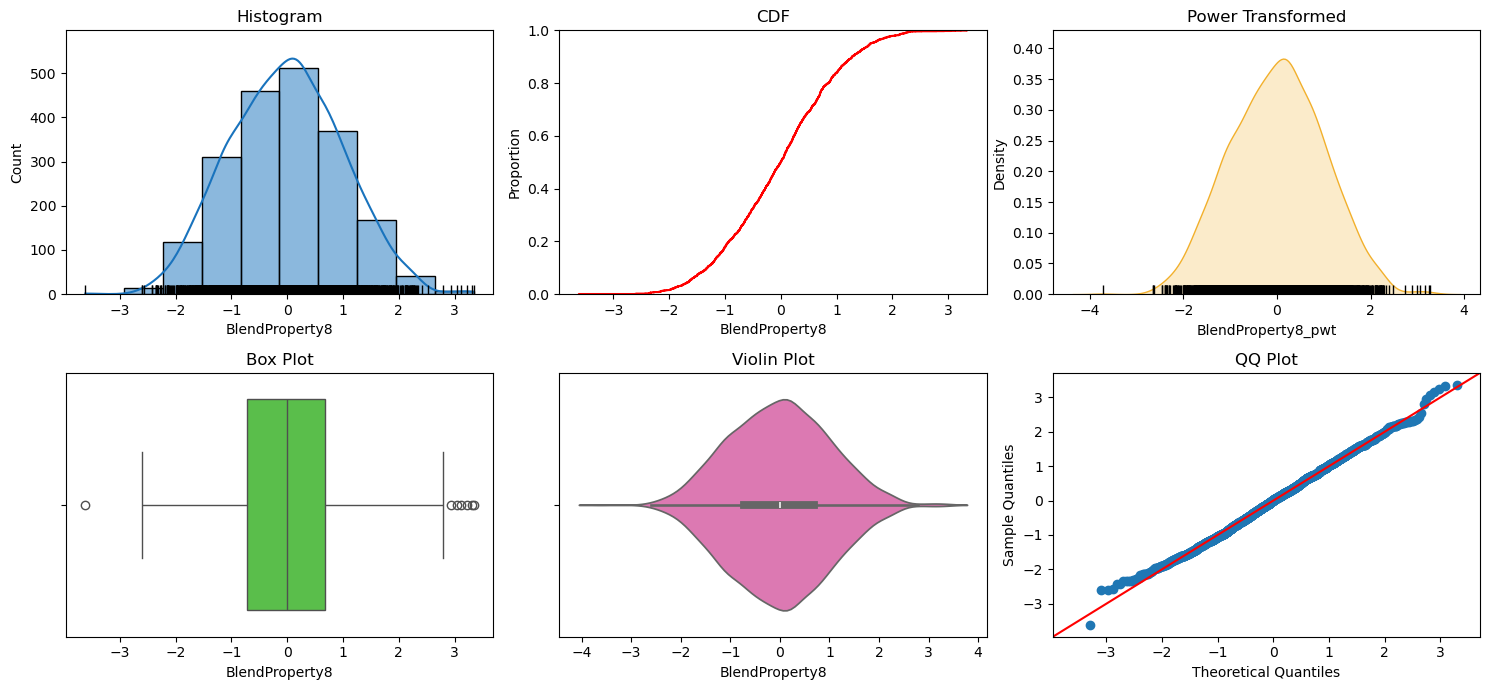

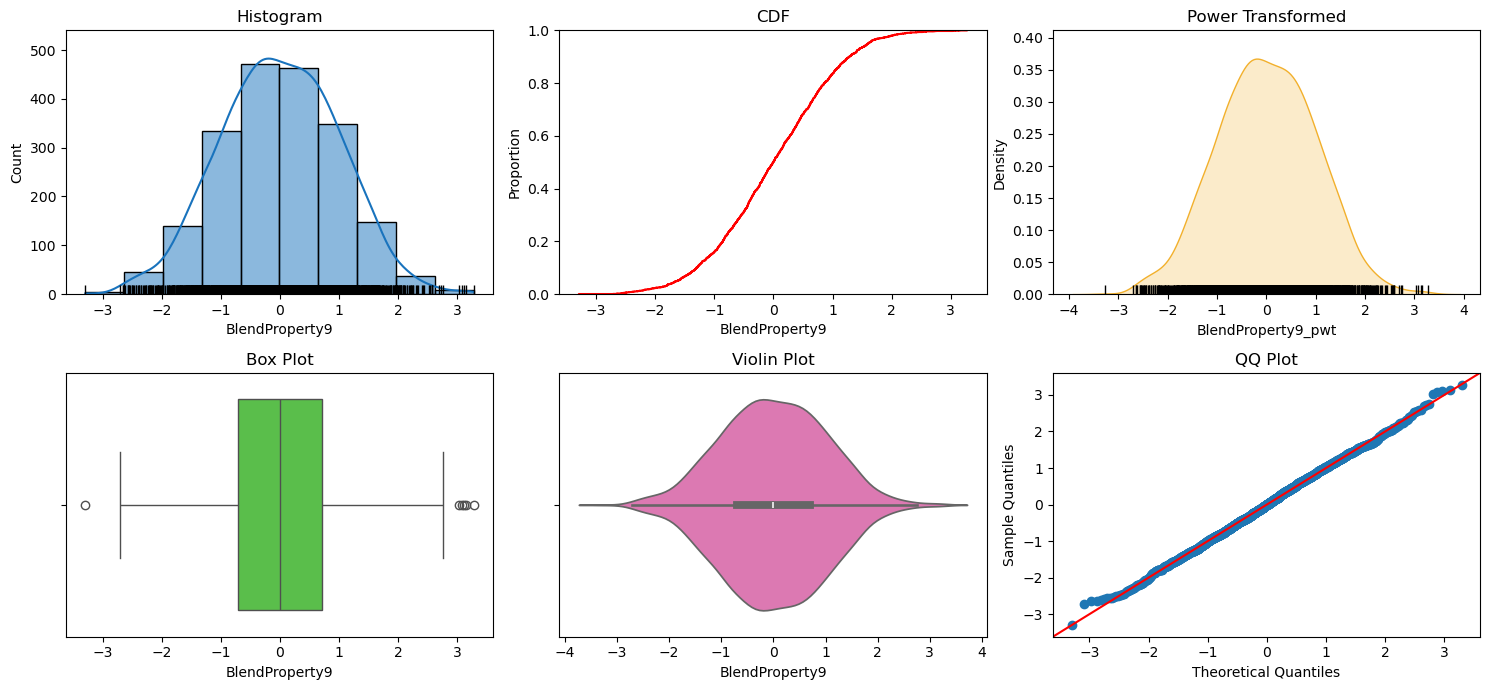

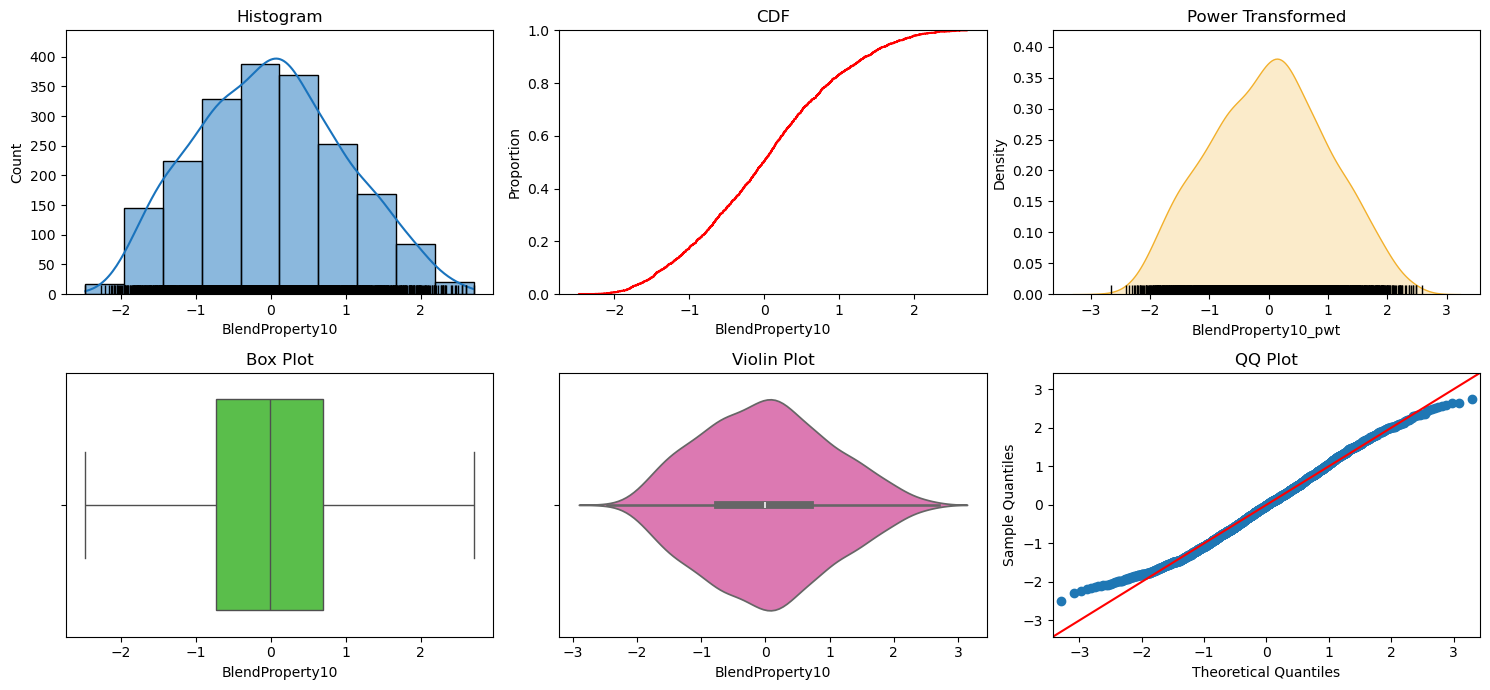

In [9]:
for i in blend_properties.columns:
    eda_helper.num_univar_plots(train,i)

In [10]:
train.columns

Index(['Component1_fraction', 'Component2_fraction', 'Component3_fraction',
       'Component4_fraction', 'Component5_fraction', 'Component1_Property1',
       'Component2_Property1', 'Component3_Property1', 'Component4_Property1',
       'Component5_Property1', 'Component1_Property2', 'Component2_Property2',
       'Component3_Property2', 'Component4_Property2', 'Component5_Property2',
       'Component1_Property3', 'Component2_Property3', 'Component3_Property3',
       'Component4_Property3', 'Component5_Property3', 'Component1_Property4',
       'Component2_Property4', 'Component3_Property4', 'Component4_Property4',
       'Component5_Property4', 'Component1_Property5', 'Component2_Property5',
       'Component3_Property5', 'Component4_Property5', 'Component5_Property5',
       'Component1_Property6', 'Component2_Property6', 'Component3_Property6',
       'Component4_Property6', 'Component5_Property6', 'Component1_Property7',
       'Component2_Property7', 'Component3_Property7', 'C

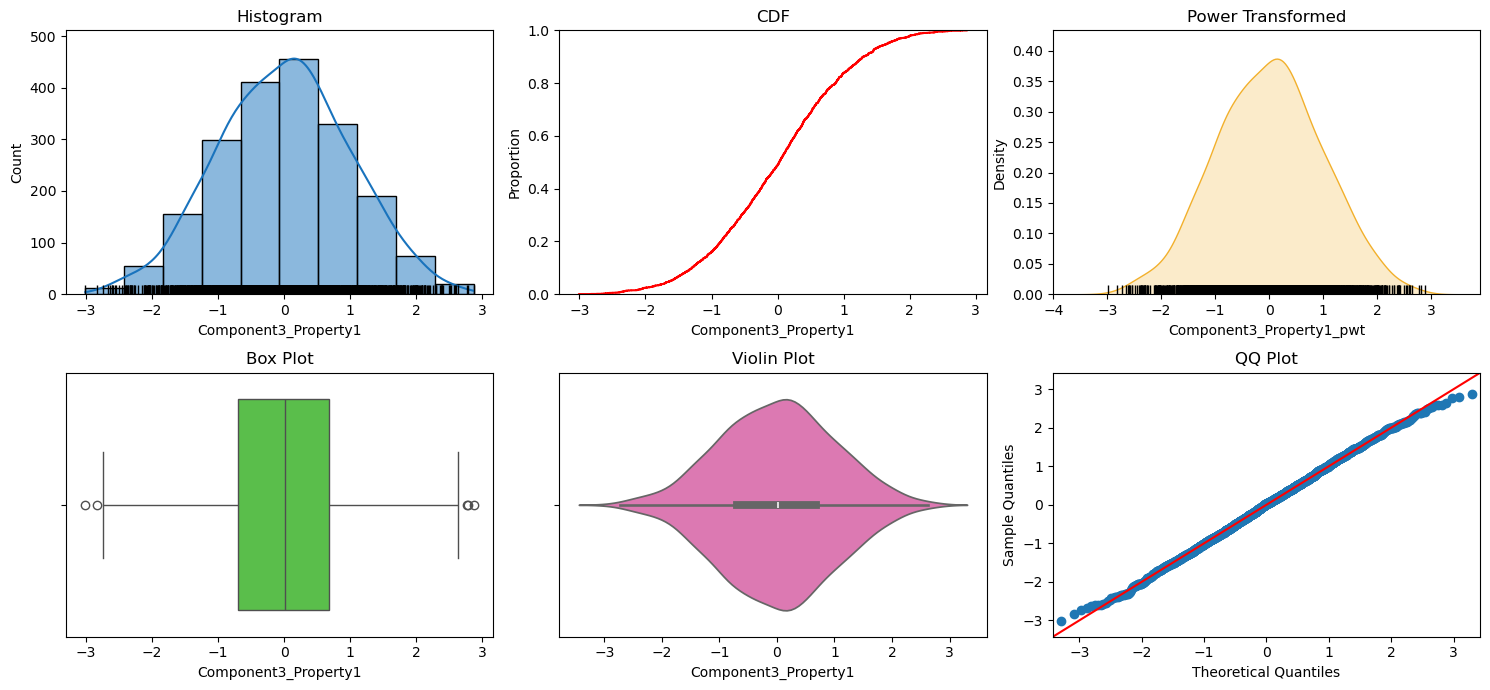

In [14]:
eda_helper.num_univar_plots(train,'Component3_Property1')